# Задание 1

Разбейте множество объектов из набора данных pluton.csv на 3 кластера с помощью k-means. Сравните качество разбиения в зависимости от максимального числа итераций алгоритма и использования стандартизации.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from sklearn.utils import shuffle

from scipy.cluster.hierarchy import linkage, dendrogram

In [7]:
data = pd.read_csv('lab3_files/pluton.csv')

data.describe()

,Pu238,Pu239,Pu240,Pu241
count,45.000000,45.000000,45.000000,45.000000
mean,0.721622,69.934689,21.533489,5.329822
std,0.574343,7.133270,2.411510,3.016408
min,0.102000,58.688000,17.872000,1.674000
25%,0.162000,61.585000,19.108000,2.365000
50%,0.397000,72.907000,21.429000,3.836000
75%,1.309000,75.751000,23.239000,8.300000
max,1.638000,79.840000,25.719000,9.972000


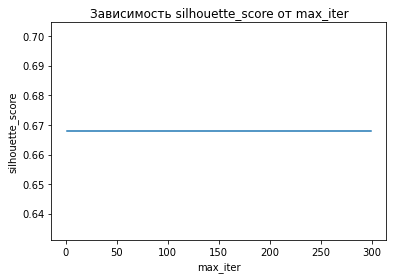

In [29]:
max_iter_list = [i for i in range(1, 300)]
silhouette_score_list = []

for max_iter in max_iter_list:
    kmeans = KMeans(n_clusters=3, random_state=1, max_iter=max_iter)
    kmeans.fit(data)
    silhouette_score_list.append(metrics.silhouette_score(data, kmeans.labels_))
    
plt.title("Зависимость silhouette_score от max_iter")
axes = plt.gca()
axes.set_ylabel('silhouette_score')
axes.set_xlabel('max_iter')
plt.plot(max_iter_list, silhouette_score_list)
plt.show()

# Задание 2

Разбейте на кластеры множество объектов из наборов данных clustering_1.csv, clustering_2.csv и clustering_3.csv с помощью k-means, DBSCAN и иерархической кластеризации. Определите оптимальное количество кластеров (где это применимо). Какой из методов сработал лучше и почему?

In [78]:
def get_data_plot(cluster, data):    
    y = cluster.fit_predict(data)
    # cluster_centers = cluster.cluster_centers_

    plt.scatter(data['X1'], data['X2'], c=y)
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = 'x', c='black', s=50)
    plt.title(cluster.__class__.__name__)
    plt.show()

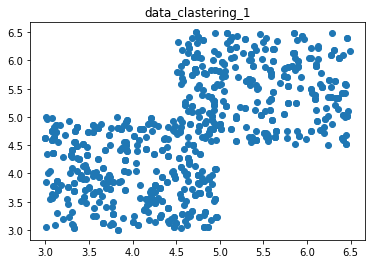

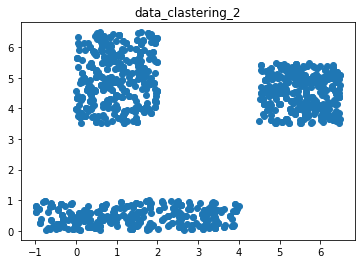

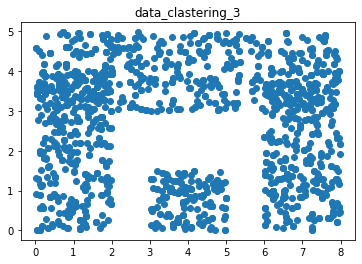

In [47]:
data_clastering_1 = pd.read_csv('lab3_files/clustering_1.csv', sep='\t', header=None)
data_clastering_1.columns = ['X1', 'X2']
plt.scatter(data_clastering_1['X1'], data_clastering_1['X2'])
plt.title('data_clastering_1')
plt.show()

data_clastering_2 = pd.read_csv('lab3_files/clustering_2.csv', sep='\t', header=None)
data_clastering_2.columns = ['X1', 'X2']
plt.scatter(data_clastering_2['X1'], data_clastering_2['X2'])
plt.title('data_clastering_2')
plt.show()

data_clastering_3 = pd.read_csv('lab3_files/clustering_3.csv', sep='\t', header=None)
data_clastering_3.columns = ['X1', 'X2']
plt.scatter(data_clastering_3['X1'], data_clastering_3['X2'])
plt.title('data_clastering_3')
plt.show()

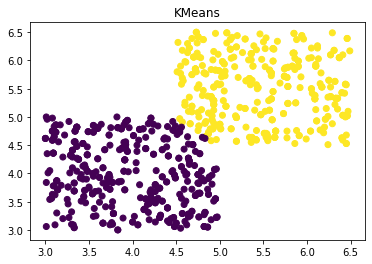

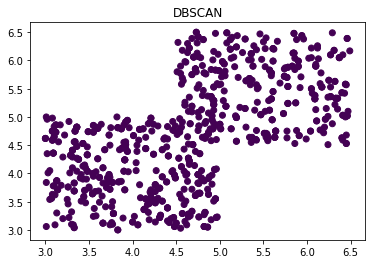

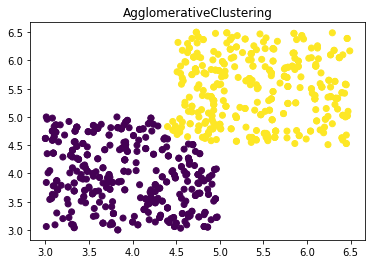

In [88]:
kmeans = KMeans(n_clusters=2, random_state=1)
dbscan = DBSCAN()
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

get_data_plot(kmeans, data_clastering_1)
get_data_plot(dbscan, data_clastering_1)
get_data_plot(agglomerative_clustering, data_clastering_1)

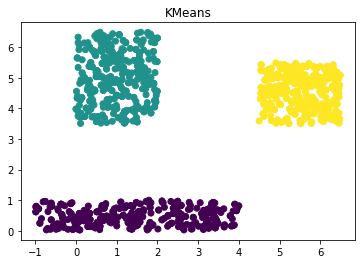

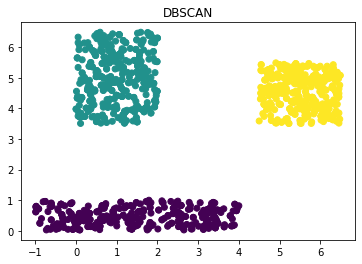

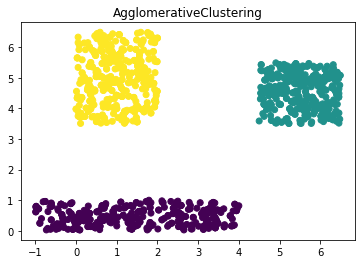

In [89]:
kmeans = KMeans(n_clusters=3, random_state=1)
dbscan = DBSCAN()
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)

get_data_plot(kmeans, data_clastering_2)
get_data_plot(dbscan, data_clastering_2)
get_data_plot(agglomerative_clustering, data_clastering_2)

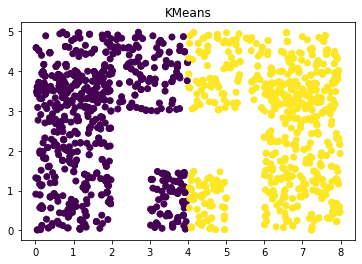

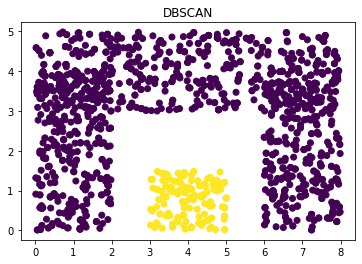

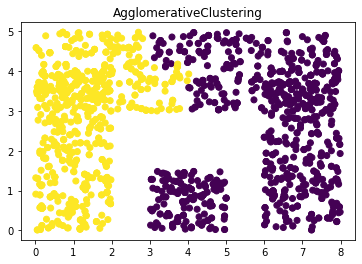

In [90]:
kmeans = KMeans(n_clusters=2, random_state=1)
dbscan = DBSCAN()
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

get_data_plot(kmeans, data_clastering_3)
get_data_plot(dbscan, data_clastering_3)
get_data_plot(agglomerative_clustering, data_clastering_3)

# Задание 3

Осуществите сжатие цветовой палитры изображения (любого, на ваш выбор). Для этого выделите n кластеров из цветов всех пикселей изображения и зафиксируйте центра этих кластеров. 

Создайте изображение с цветами из сокращенной палитры (цвета пикселей только из центров выделенных кластеров). Покажите исходное и сжатое изображения.

In [94]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

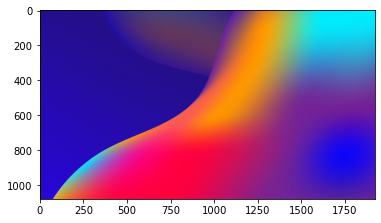

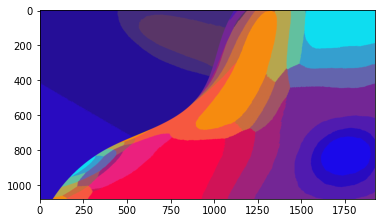

In [116]:
n_colors = 20
 
img = Image.open('lab3_files/img.jpg')
img = np.array(img, dtype=np.float64) / 255

w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.imshow(img)
plt.show()
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

# Задание 4

Постройте дендрограмму для набора данных votes.csv (число голосов, поданных за республиканцев на выборах с 1856 по 1976 год). Строки представляют 50 штатов, а столбцы - годы выборов (31). Проинтерпретируйте полученный результат.

In [11]:
data_votes = pd.read_csv('lab3_files/votes.csv')

data_votes.fillna(0, inplace=True)
data_votes

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,0.00,0.00,0.00,51.44,53.19,40.02,36.98,38.44,32.28,3.95,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,50.94,34.1,45.3,58.1,62.91
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,0.00,0.00,0.00,53.73,52.17,39.88,39.55,40.50,38.07,32.01,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89
5,0.00,0.00,0.00,0.00,0.00,0.00,51.28,54.39,55.31,41.13,...,50.92,53.21,46.52,60.27,59.49,54.63,38.7,50.5,62.6,55.89
6,53.18,53.86,51.38,51.54,52.25,48.34,50.52,48.01,48.44,46.80,...,46.30,46.94,49.55,55.70,63.73,46.27,32.2,44.3,58.6,52.64
7,2.11,23.71,48.20,40.98,50.99,44.55,47.86,42.75,43.55,48.55,...,45.05,45.27,50.04,51.75,55.09,49.00,39.1,45.1,59.6,47.27
8,0.00,0.00,0.00,0.00,53.52,50.99,45.83,46.82,39.94,0.00,...,25.99,29.68,33.63,55.01,57.20,51.51,48.9,40.5,71.9,46.83
9,0.00,0.00,0.00,35.72,43.77,27.94,34.33,33.84,28.33,21.80,...,14.84,18.25,18.31,30.34,33.22,37.44,54.1,30.4,75.0,33.02


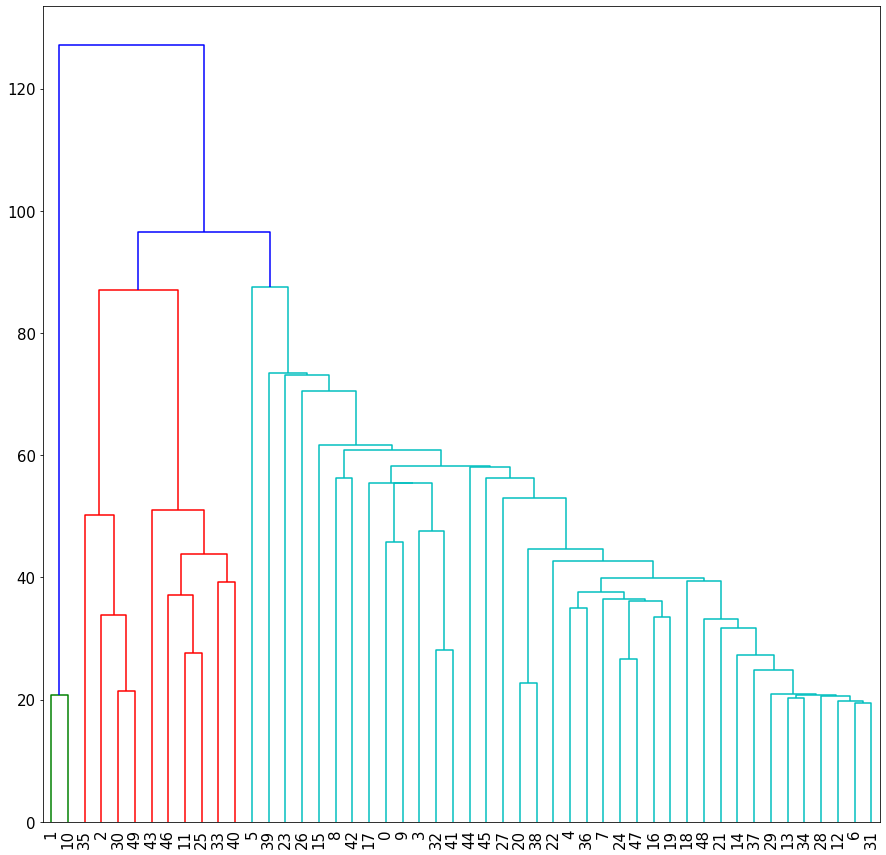

In [14]:
mergings = linkage(data_votes, 'single')

states = [i for i in range(50)]

plt.figure(figsize=(15, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

dendrogram(mergings,
           labels=states,
           leaf_font_size=15)

plt.show()